## Finding Key Connectors
The VP of Networking wants to identify the "key connectors" among data scientists on the DataSciencester network.

### User Data

In [1]:
users = [
     {"id" : 0, "name" : "Hero"},
     {"id" : 1, "name" : "Dunn"},
     {"id" : 2, "name" : "Sue"},
     {"id" : 3, "name" : "Chi"},
     {"id" : 4, "name" : "Thor"},
     {"id" : 5, "name" : "Clive"},
     {"id" : 6, "name" : "Hicks"},
     {"id" : 7, "name" : "Delvin"},
     {"id" : 8, "name" : "Kate"},
     {"id" : 9, "name" : "Klein"}
]

### Friendship Data
For example, the tuple (0, 1) indicates that the data scientists with id 0 (Hero) and the data scientist with id 1 (Dunn) are friends. 

In [4]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [73]:
## Let's augment our users with extra data.
for user in users:
    user["friends"] = []
    
## Let's populate the lists with friendship data
for i, j in friendships:
    users[i]["friends"].append(users[j])
    users[j]["friends"].append(users[i])
    
## Once each user dict contains a list of friends, we can ask questions of our graph like 
## what's the average number of connections
def number_of_friends(user):
    """ how many friends does _user_ have?"""
    return len(user["friends"])

total_connections = sum(number_of_friends(user) for user in users)

## and then we divide by the number of users
num_users = len(users)
avg_connections = total_connections / num_users
avg_connections

## finding the most connected people - they're the people with the largest
## number of friends

num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]

sorted(num_friends_by_id, key=lambda elem: elem[1], reverse=True)

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

### Data Scientists You May Know
I was asked to design a "Data Scientists You May Know" suggester. 

In [79]:
def friends_of_friend_ids_bad(user):
    return [foaf["id"]
           for friend in user["friends"]
           for foaf in friend["friends"]]

friends_of_friend_ids_bad(users[0])

print([friend["id"] for friend in users[0]["friends"]])
print([friend["id"] for friend in users[1]["friends"]])
print([friend["id"] for friend in users[2]["friends"]])

[1, 2]
[0, 2, 3]
[0, 1, 3]


Knowing that people are friends-of-friends in multiple ways seems like interesting information, so maybe instead we should produce a count of mutual friends. And we definitely should use a helper function to exclude people already known to the user.

In [85]:
from collections import Counter

def not_the_same(user, other_user):
    "to users are not the same if they have different ids"
    return user["id"] != other_user["id"]


def not_friends(user, other_user):
    "other_user is not a friend if he's not in user['friends']; \
    that is, if he's not_the_same as all people in user['friends']"
    return all(not_the_same(friend, other_user) for friend in user["friends"])


def friends_of_friends_ids(user):
    return Counter(foaf["id"] for friend in user["friends"]
                  for foaf in friend["friends"]
                  if not_the_same(user, foaf)
                  and not_friends(user, foaf))

In [ ]:
print(friends_of_friends_ids(users[3]))

As a data scientist, you know taht you also might enjoy meeting users with similar interests.

In [92]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

It's easy to build a function that finds users with certain interest.

In [ ]:
def data_scientists_who_like(target_interest):
    return [user_id for user_id, user_interest in interests
           if user_interest == target_interest]


## This works, but it has to examine the whole list of interests for every search. 
## If we have a lot users and interests (or if we just want to do a lot of
## searches), we're probably better of building an index from interests to users.

from collections import defaultdict

# keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)




user_ids_by_interest



And another from users to interests

In [ ]:
## keys are user_ids, values are lists of interests for that user_id
interest_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interest_by_user_id[user_id].append(interest)
interest_by_user_id

Now it's easy to find who has the most interests in common with a given user.
- Iterate over the user's interest
- For each interest, iterate over the other users with that interest
- Keep count of how many times we see each other user.

In [105]:
def most_common_interests_with(user):
    return Counter(interested_user_id 
                  for interest in interest_by_user_id[user["id"]]
                  for interested_user_id in user_ids_by_interest[interest]
                  if interested_user_id != user["id"])

most_common_interests_with(users[0])

Counter({9: 3, 8: 1, 1: 2, 5: 1})

## Sales and Experience

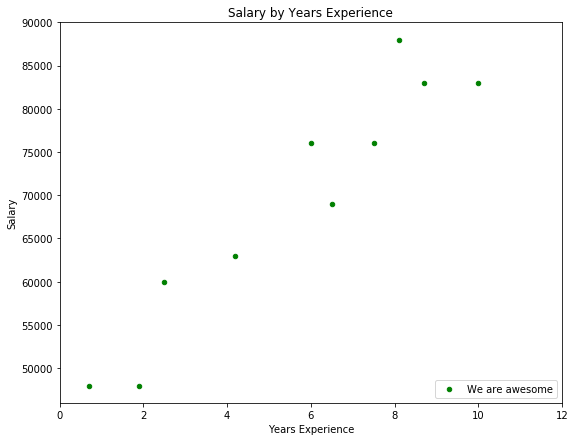

In [123]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

## let's try to make a plot with this data
from matplotlib import pyplot as plt
figure = plt.figure(figsize=(9, 7))
plt.scatter([point[1] for point in salaries_and_tenures], [point[0] for point in salaries_and_tenures], color='green', s=20, label='We are awesome')
plt.title("Salary by Years Experience")
plt.xlabel("Years Experience")
plt.xticks([0, 2, 4, 6, 8, 10, 12])
plt.ylabel("Salary")
plt.legend(loc="lower right")
plt.show()

It seems pretty clear that people with more experience have higher salaries. How can I turn this into a fun fact?

In [124]:
## keys are years, values are lists of the salaries for each tenure
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)
    
    
# keys are years, each value is average salary for that tenure
average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

It might be more helpful to bucket the tenures


In [129]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"

Then group together the salaries corresponding to each bucket

In [130]:
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)
    
    


In [132]:
## And finally compute the average salary for each group

average_salary_by_bucket = {
    tenure_bucket : sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

In [133]:
average_salary_by_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}

Data scientists with more than 5 years experience earn 65% more than data scientists with little or no experience

## Paid Accounts

The VP of Revenue is waiting for me. She wants to better understand which users pay for accounts and which don't. (She knows thier names, but that's not particularly actionable information)

In [135]:
dummy_data = [(0.7, "paid"), (1.9, "unpaid"), (2.5, "paid"), 
              (4.2, "unpaid"), (6, "unpaid"), (6.5, "unpaid"),
              (7.5, "unpaid"), (8.1, "unpaid"), (8.7, "unpaid"),
              (10, "paid")]


Users with very few and very many years of experience tend to pay; users with average amounts of experience don't.

In [136]:
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
        return "paid"
    elif years_experience < 8.5:
        return "unpaid"
    else:
        return "paid"
    

Of course, I totally eyeballed the cutoffs. With more data(and more math), I could build a model predicting the likelihood that a user would pay, based on his years of experience. I'll investigate this sort of problem later.

## Topics of Interest


As I am wrapping up my day, the VP of Content Strategy asks me for data about what topics users are most interested in, so that she can plan out her blog calendar accordingly. 

One simple way to find the most popular interests is to simply count the words.
- Lowercase each interest (since different users may or may not capitalize their interests)
- Split it into words
- Count the results

In [140]:
words_and_counts = Counter(word for user, interest in  interests 
                           for word in interest.lower().split())

# this makes it easy to list out words that occur more than once
for word, count in words_and_counts.most_common():
    if count > 1:
        print( word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2
